<a href="https://colab.research.google.com/github/nguyentrong-phuc/BAI_TAP_NHAN_DIEN_ANH/blob/main/Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
%cd /content/drive/MyDrive/AI/BTVN/flowers

/content/drive/MyDrive/AI/BTVN/flowers


In [9]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [10]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/AI/BTVN/flowers/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 2684 images belonging to 5 classes.


In [11]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/AI/BTVN/flowers/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1628 images belonging to 5 classes.


In [12]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [13]:
validation.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [14]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [17]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=20,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/20
84/84 [==============================] - 2081s 25s/step - loss: 1.4126 - accuracy: 0.3808 - val_loss: 1.4245 - val_accuracy: 0.4048
Epoch 2/20
84/84 [==============================] - 594s 7s/step - loss: 1.1967 - accuracy: 0.5037 - val_loss: 1.1908 - val_accuracy: 0.5092
Epoch 3/20
84/84 [==============================] - 588s 7s/step - loss: 1.0405 - accuracy: 0.5935 - val_loss: 1.1091 - val_accuracy: 0.5584
Epoch 4/20
84/84 [==============================] - 591s 7s/step - loss: 0.9625 - accuracy: 0.6386 - val_loss: 0.9866 - val_accuracy: 0.6112
Epoch 5/20
84/84 [==============================] - 593s 7s/step - loss: 0.8975 - accuracy: 0.6647 - val_loss: 1.0695 - val_accuracy: 0.6044
Epoch 6/20
84/84 [==============================] - 590s 7s/step - loss: 0.8656 - accuracy: 0.6785 - val_loss: 0.9588 - val_accuracy: 0.6339
Epoch 7/20
84/84 [==============================] - 594s 7s/step - loss: 0.7956 - accuracy: 0.6986 - val_loss: 0.9387 - val_accuracy: 0.6388
Epoch 8/20


In [18]:
# Lưu 
model.save("flowers.h5")
model_1=load_model('flowers.h5')

In [19]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.3449517786502838
Train Accuracy 0.881147563457489


<function matplotlib.pyplot.show(*args, **kw)>

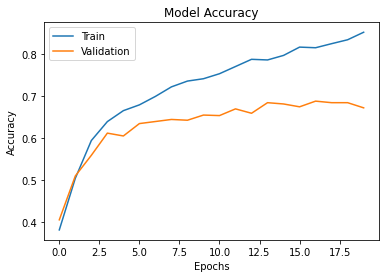

In [20]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 0s 74ms/step
HOA CUC


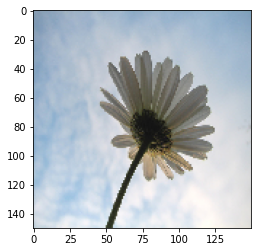

1/1 [==============================] - 0s 73ms/step
TULIP


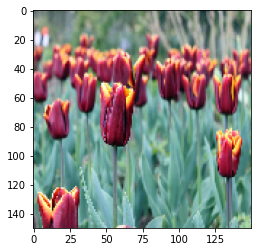

1/1 [==============================] - 0s 75ms/step
HUONG DUONG


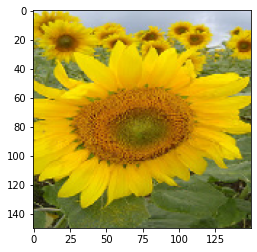

1/1 [==============================] - 0s 93ms/step
HOA HONG


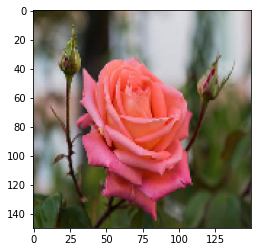

1/1 [==============================] - 0s 78ms/step
BO CONG ANH


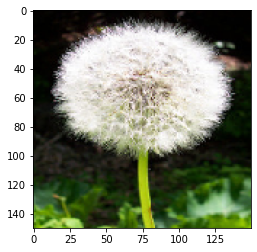

1/1 [==============================] - 0s 72ms/step
HOA HONG


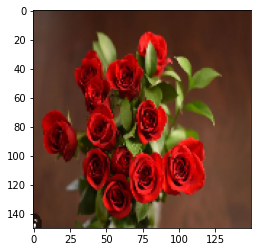

1/1 [==============================] - 0s 73ms/step
HOA CUC


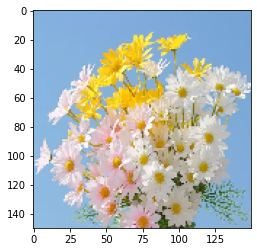

1/1 [==============================] - 0s 73ms/step
BO CONG ANH


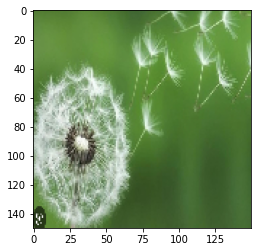

1/1 [==============================] - 0s 75ms/step
HUONG DUONG


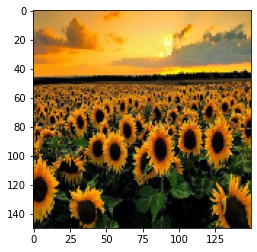

1/1 [==============================] - 0s 72ms/step
TULIP


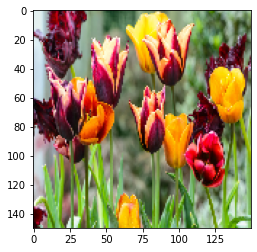

In [22]:
test="/content/drive/MyDrive/AI/BTVN/flowers/test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['HOA CUC','BO CONG ANH','HOA HONG','HUONG DUONG','TULIP']
  print(class_name[result])
  plt.show()